In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Image blending is done by through the addWeighted function in OpenCV
# The images must be the same type
# The formula for the blending is: g(x) = (1 - α)f0(x) + αf1(x)
# Where α is the weight of the first image and (1 - α) is the weight of the second image

In [3]:
## SAME SIZE IMAGE BLENDING

# Load the images
img1 = cv2.imread('../Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

(1401, 934, 3)

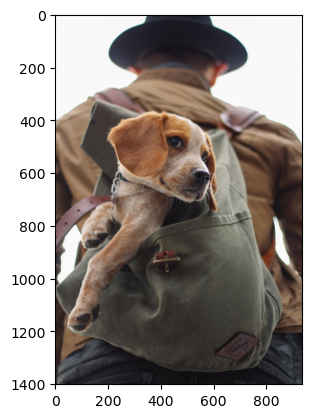

In [4]:
plt.imshow(img1)
img1.shape

(1280, 1277, 3)

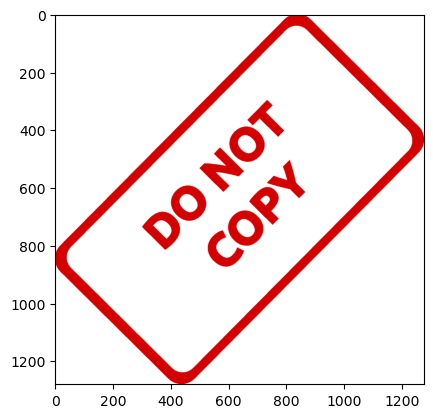

In [5]:
plt.imshow(img2)
img2.shape

In [6]:
# Resize image to be same size
img1 = cv2.resize(img1, (1200,1200))
img2 = cv2.resize(img2, (1200,1200))

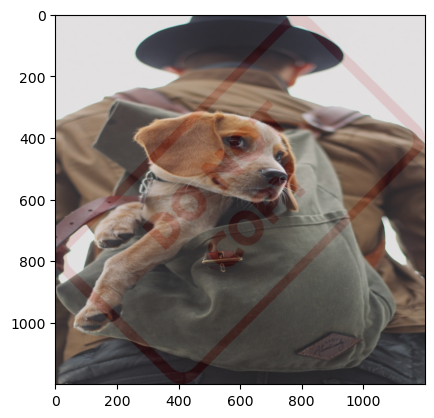

In [7]:
# Blend images
blendImg = cv2.addWeighted(img1, 0.8, img2, 0.1, 0)
plt.imshow(blendImg)

In [8]:
## DIFFERENT SIZE IMAGE OVERLAY

# Load the images
largeImg = cv2.imread('../Computer-Vision-with-Python/DATA/dog_backpack.png')
largeImg = cv2.cvtColor(largeImg, cv2.COLOR_BGR2RGB)
smallImg = cv2.imread('../Computer-Vision-with-Python/DATA/watermark_no_copy.png')
smallImg = cv2.cvtColor(smallImg, cv2.COLOR_BGR2RGB)

smallImg = cv2.resize(smallImg, (600,600))

In [9]:
# Resize
# numpy slicing: start and overlay img (where to past img)
x_offset = 200
y_offset = 400
x_end = x_offset + smallImg.shape[1]
y_end = y_offset + smallImg.shape[0]

In [10]:
largeImg[y_offset:y_end, x_offset:x_end] = smallImg

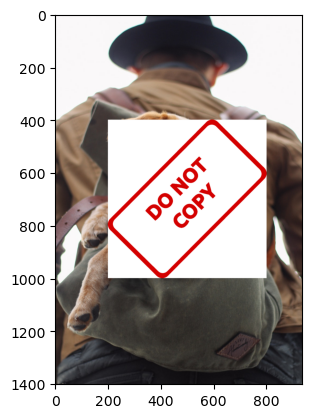

In [11]:
plt.imshow(largeImg)

In [ ]:
## DIFFERENT SIZE IMAGE BLENDING

In [21]:
# Load the images
img1 = cv2.imread('../Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

img2 = cv2.resize(smallImg, (600,600))
img1.shape

(1401, 934, 3)

In [22]:
x_offset = 934 - 600
y_offset = 1401 - 600

In [23]:
img2.shape

(600, 600, 3)

In [24]:
rows, cols, channels = img2.shape

In [28]:
rows, cols, channels

(600, 600, 3)

In [30]:
roi = img1[y_offset:1401, x_offset:934]

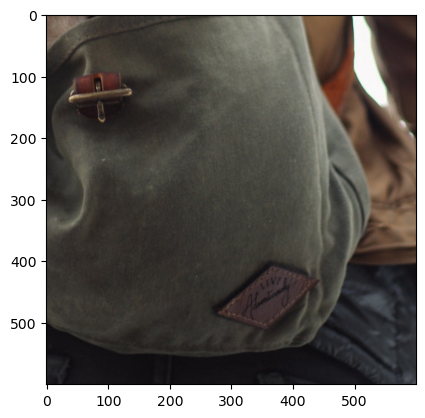

In [32]:
plt.imshow(roi)

In [33]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

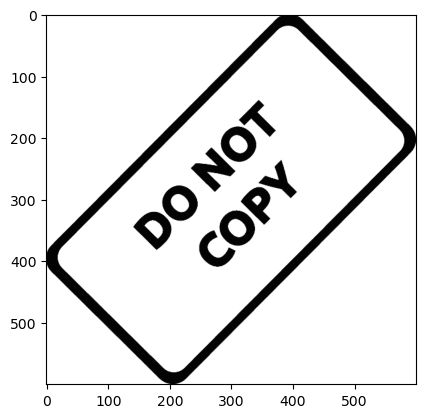

In [35]:
plt.imshow(img2gray, cmap='gray')

In [36]:
mask_inv = cv2.bitwise_not(img2gray)

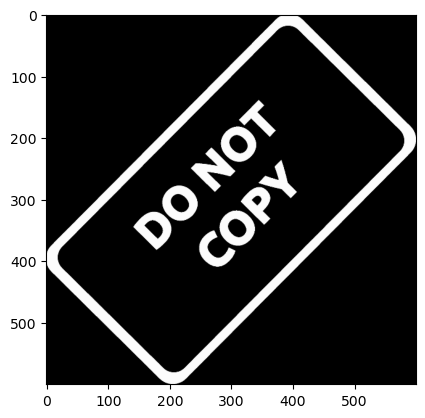

In [38]:
plt.imshow(mask_inv,cmap='gray')

In [39]:
mask_inv.shape

(600, 600)

In [40]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [44]:
# white background
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)

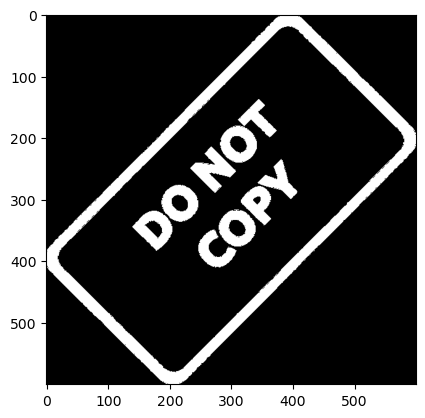

In [45]:
plt.imshow(bk)

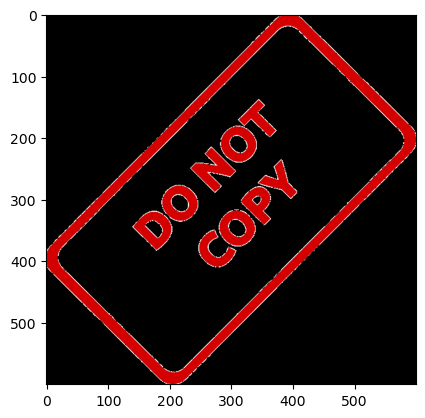

In [46]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)
plt.imshow(fg)

In [47]:
final_roi = cv2.bitwise_or(roi,fg)

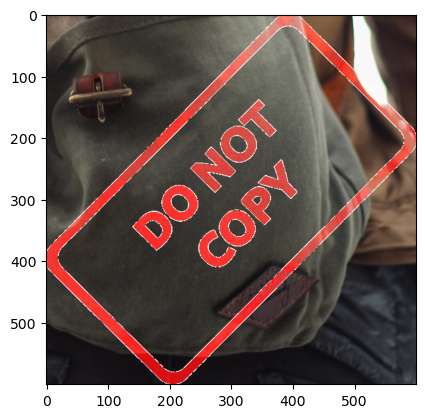

In [48]:
plt.imshow(final_roi)

In [50]:
largeImg = img1
smallImg = final_roi

In [52]:
largeImg[y_offset:y_offset+smallImg.shape[0], x_offset:x_offset+smallImg.shape[1]] = final_roi

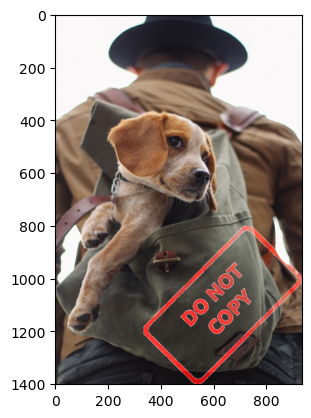

In [53]:
plt.imshow(largeImg)